In [1]:
import tensorflow as tf;

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
test_label.shape, test_label.shape

((10000,), (10000,))

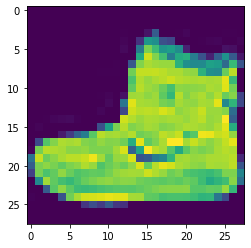

In [7]:
plt.imshow(train_image[0])

In [8]:
np.max(train_image[0])

255

In [6]:
train_image = train_image / 255
test_image = test_image / 255

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 二维吧扁平为一维
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [15]:
history = model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4994 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3742 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3386 - acc: 0.8753
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3123 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2961 - acc: 0.8906


In [16]:
model.evaluate(test_image, test_label) #测试训练后的模型

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3612 - acc: 0.8694


[0.3612156458377838, 0.8694]

In [7]:
train_label_onehot = tf.keras.utils.to_categorical(train_label) #独热编码

In [8]:
test_label_onehot = tf.keras.utils.to_categorical(test_label) #独热编码

In [9]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 二维吧扁平为一维
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [23]:
history = model.fit(train_image, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5021 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3796 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3394 - acc: 0.8760
Epoch 4/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3162 - acc: 0.8845
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2986 - acc: 0.8905


In [24]:
predict = model.predict(test_image)

In [26]:
predict.shape

(10000, 10)

In [27]:
np.argmax(predict[0])

9

In [31]:
test_label[0]

9

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 二维吧扁平为一维
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu')) # 3个隐藏层
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [12]:
history = model.fit(
    train_image, 
    train_label_onehot,
    epochs=10,
    validation_data=(test_image, test_label_onehot)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4862 - acc: 0.8239 - val_loss: 0.4238 - val_acc: 0.8504
Epoch 2/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3654 - acc: 0.8653 - val_loss: 0.4230 - val_acc: 0.8443
Epoch 3/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3301 - acc: 0.8798 - val_loss: 0.3549 - val_acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3099 - acc: 0.8856 - val_loss: 0.3418 - val_acc: 0.8769
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2912 - acc: 0.8910 - val_loss: 0.3450 - val_acc: 0.8743
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2790 - acc: 0.8960 - val_loss: 0.3590 - val_acc: 0.8693
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2655 - acc: 0.9021 - val_loss: 0.

In [13]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

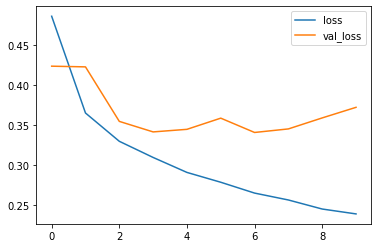

In [16]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

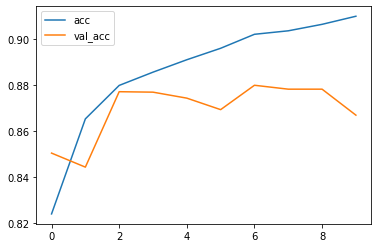

In [17]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

上面出现 过拟合：训练数据上得分高，测试数据上得分低

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 二维吧扁平为一维
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu')) # 3个隐藏层
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [21]:
history = model.fit(
    train_image, 
    train_label_onehot,
    epochs=10,
    validation_data=(test_image, test_label_onehot)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.8696 - acc: 0.6814 - val_loss: 0.5250 - val_acc: 0.8015
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.6189 - acc: 0.7821 - val_loss: 0.4754 - val_acc: 0.8279
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5747 - acc: 0.7980 - val_loss: 0.4502 - val_acc: 0.8389
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5486 - acc: 0.8071 - val_loss: 0.4370 - val_acc: 0.8430
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5336 - acc: 0.8131 - val_loss: 0.4348 - val_acc: 0.8424
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5225 - acc: 0.8166 - val_loss: 0.4163 - val_acc: 0.8523
Epoch 7/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5130 - acc: 0.8215 - val_loss: 0

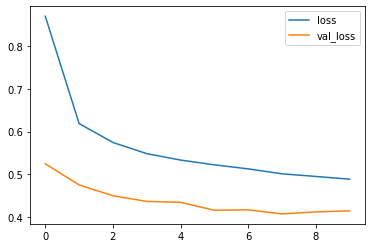

In [22]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

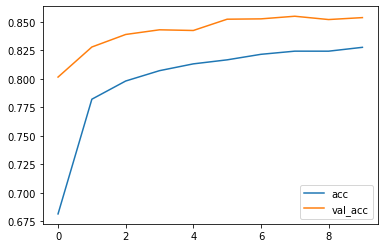

In [23]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 二维吧扁平为一维
model.add(tf.keras.layers.Dense(32, activation='relu')) # 小型网络
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [25]:
history = model.fit(
    train_image, 
    train_label_onehot,
    epochs=10,
    validation_data=(test_image, test_label_onehot)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5674 - acc: 0.8070 - val_loss: 0.5361 - val_acc: 0.8116
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4240 - acc: 0.8503 - val_loss: 0.4408 - val_acc: 0.8437
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3890 - acc: 0.8612 - val_loss: 0.4400 - val_acc: 0.8402
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3693 - acc: 0.8683 - val_loss: 0.4315 - val_acc: 0.8447
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3545 - acc: 0.8736 - val_loss: 0.4099 - val_acc: 0.8543
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3420 - acc: 0.8772 - val_loss: 0.4023 - val_acc: 0.8548
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3318 - acc: 0.8799 - val_loss: 0.

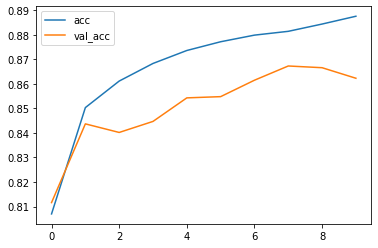

In [26]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()